In [ ]:
# AUTOENCODER

In [ ]:
# This notebook uses PyTorch, which is a library that can automatically differentiate functions
# and is commonly used to implement neural networks. 
# Because of its capability to automatically differentiate functions, 
# the formula for the gradient does not need to be manually derived -- this comes especially handy
# when working with neural networks, whose gradient formula can be quite complicated, 
# especially for complex architectures.

In [ ]:
# It is recommended running this notebook on Google Colab to avoid having to install PyTorch
# and to take advantage of GPUs, which make training faster.

In [2]:
# load packages
# make sure to install the pacakge "tqdm" for the progress bar when training.
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import imageio
import matplotlib.image as mpimg
from scipy import ndimage

path_prefix = ""

In [8]:
path_prefix = "Autodownload_Data"

import sys
sys.path.insert(1, path_prefix)

In [ ]:
# The Autoencoder class has several important functions unimplemented. 
# Below are the two sub-classes of Encoder and Decoder, 
# i.e, the architecture and forward function of the encoder and decoder.
# Structure (28*28-2-28*28)

In [4]:
class Autoencoder(nn.Module):

    def __init__(self,dim_latent_representation=2):

        super(Autoencoder,self).__init__()

        class Encoder(nn.Module):
            def __init__(self, output_size=2):
                super(Encoder, self).__init__()
                # needs your implementation
                self.encoder = nn.Sequential(
                    nn.Linear(28*28,2)
                )
                pass

            def forward(self, x):
                # needs your implementation
                x = torch.reshape(x, (x.size(0),28*28))
                x = self.encoder(x)
                return x
                pass

        class Decoder(nn.Module):
            def __init__(self, input_size=2):
                super(Decoder, self).__init__()
                # needs your implementation
                self.decoder = nn.Sequential(
                    nn.Linear(2,28*28),
                    nn.Sigmoid(),
                )
                pass

            def forward(self, z):
                # needs your implementation
                z = self.decoder(z)
                z = torch.reshape(z, (z.size(0),1,28,28))
                return z
                pass

        self.encoder = Encoder(output_size=dim_latent_representation)
        self.decoder = Decoder(input_size=dim_latent_representation)

    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
# Training the Model
# The training loop is provided by the Autoencoder_Trainer class from autoencoder_starter.py.
# Learning Rate = 1e-3, Epoch = 12
# Ignore the Warning

In [5]:
# Imoprting Autoencoder_trainer from autoencoder_starter.py file
from autoencoder_starter import Autoencoder_Trainer

LEARNING_RATE = 1e-3
EPOCH_NUMBER= 12 # the number of epochs and learning rate can be tuned.

autoencoder = Autoencoder(dim_latent_representation=2)
trainer = Autoencoder_Trainer(autoencoder_model=autoencoder,learning_rate=LEARNING_RATE,path_prefix=path_prefix)

try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

Using downloaded and verified file: Autodownload_Data/./data/MNIST/raw/train-images-idx3-ubyte.gz
Extracting Autodownload_Data/./data/MNIST/raw/train-images-idx3-ubyte.gz to Autodownload_Data/./data/MNIST/raw

Using downloaded and verified file: Autodownload_Data/./data/MNIST/raw/train-labels-idx1-ubyte.gz
Extracting Autodownload_Data/./data/MNIST/raw/train-labels-idx1-ubyte.gz to Autodownload_Data/./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting Autodownload_Data/./data/MNIST/raw/t10k-images-idx3-ubyte.gz to Autodownload_Data/./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting Autodownload_Data/./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to Autodownload_Data/./data/MNIST/raw

Processing...
Done!


/Users/animesh/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1616554845587/work/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
100%|██████████| 1875/1875 [00:04<00:00, 451.71it/s]

====> Epoch: 1 Average loss: 0.8758



100%|██████████| 313/313 [00:01<00:00, 198.90it/s]

====> Val set loss (reconstruction error) : 0.8308



100%|██████████| 1875/1875 [00:03<00:00, 514.58it/s]

====> Epoch: 2 Average loss: 0.8036



100%|██████████| 313/313 [00:01<00:00, 200.91it/s]

====> Val set loss (reconstruction error) : 0.7772



100%|██████████| 1875/1875 [00:03<00:00, 496.89it/s]

====> Epoch: 3 Average loss: 0.7577



100%|██████████| 313/313 [00:01<00:00, 165.15it/s]

====> Val set loss (reconstruction error) : 0.7570



100%|██████████| 1875/1875 [00:03<00:00, 488.07it/s]

====> Epoch: 4 Average loss: 0.7463



100%|██████████| 313/313 [00:01<00:00, 178.08it/s]

====> Val set loss (reconstruction error) : 0.7499



100%|██████████| 1875/1875 [00:04<00:00, 386.99it/s]

====> Epoch: 5 Average loss: 0.7413



100%|██████████| 313/313 [00:02<00:00, 156.20it/s]

====> Val set loss (reconstruction error) : 0.7451



100%|██████████| 1875/1875 [00:04<00:00, 405.56it/s]

====> Epoch: 6 Average loss: 0.7372



100%|██████████| 313/313 [00:01<00:00, 172.41it/s]

====> Val set loss (reconstruction error) : 0.7417



100%|██████████| 1875/1875 [00:04<00:00, 409.51it/s]

====> Epoch: 7 Average loss: 0.7343



100%|██████████| 313/313 [00:01<00:00, 185.91it/s]

====> Val set loss (reconstruction error) : 0.7394



100%|██████████| 1875/1875 [00:04<00:00, 418.83it/s]

====> Epoch: 8 Average loss: 0.7321



100%|██████████| 313/313 [00:01<00:00, 179.32it/s]


====> Val set loss (reconstruction error) : 0.7376


100%|██████████| 1875/1875 [00:03<00:00, 471.71it/s]

====> Epoch: 9 Average loss: 0.7298



100%|██████████| 313/313 [00:01<00:00, 199.23it/s]

====> Val set loss (reconstruction error) : 0.7351



100%|██████████| 1875/1875 [00:03<00:00, 482.07it/s]

====> Epoch: 10 Average loss: 0.7279



100%|██████████| 313/313 [00:01<00:00, 215.25it/s]

====> Val set loss (reconstruction error) : 0.7337



100%|██████████| 1875/1875 [00:03<00:00, 473.84it/s]

====> Epoch: 11 Average loss: 0.7267



100%|██████████| 313/313 [00:01<00:00, 218.92it/s]

====> Val set loss (reconstruction error) : 0.7329



100%|██████████| 1875/1875 [00:03<00:00, 490.69it/s]

====> Epoch: 12 Average loss: 0.7261



100%|██████████| 313/313 [00:01<00:00, 211.31it/s]

====> Val set loss (reconstruction error) : 0.7323


In [ ]:
# Scatter plot 2D for all the training set images.
# We can visualize the 2D bottleneck representations of data points and their ground truth class labels 
# with a scatter plot.
# The scatter_plot function takes the following arguments:
# latent_presentations - (N, dimension_latent_representation) numpy array
# labels - (N, ) numpy array: the labels of the ground truth classes

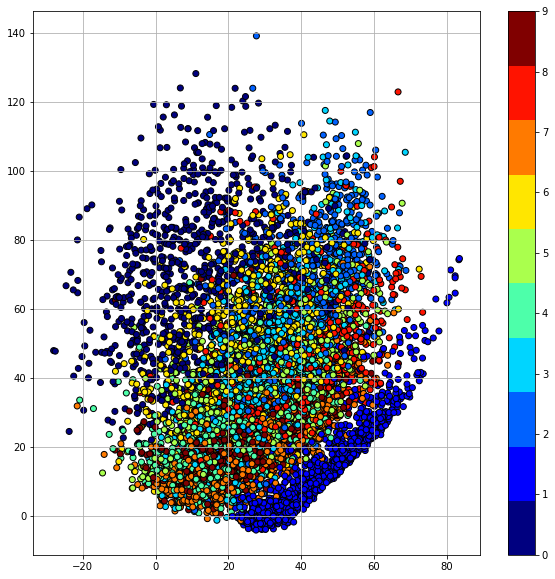

In [9]:
with torch.no_grad():
    model = trainer.model
    model.eval()
    z=[];label=[]
    for x,y in trainer.val_loader:

        z_ = model.encoder(x.to(trainer.device))
        z += z_.cpu().tolist()
        label += y.cpu().tolist()
    z = np.asarray(z)
    label = np.asarray(label)

from autoencoder_starter import scatter_plot
scatter_plot(latent_representations=z,labels=label)

In [ ]:
# Adding dense layer of 1024 neurons 
# and retraining the model.
# Model structure now (28*28-1024-2-1024-28*28)

In [10]:
class Autoencoder(nn.Module):

    def __init__(self,dim_latent_representation=2):

        super(Autoencoder,self).__init__()

        class Encoder(nn.Module):
            def __init__(self, output_size=2):
                super(Encoder, self).__init__()
                # needs your implementation
                self.encoder = nn.Sequential(
                    nn.Linear(28*28,1024),
                    nn.ReLU(),
                    nn.Linear(1024,2)
                )
                pass

            def forward(self, x):
                # needs your implementation
                x = torch.reshape(x, (x.size(0),28*28))
                x = self.encoder(x)
                return x
                pass

        class Decoder(nn.Module):
            def __init__(self, input_size=2):
                super(Decoder, self).__init__()
                # needs your implementation
                self.decoder = nn.Sequential(
                    nn.Linear(2,1024),
                    nn.ReLU(),
                    nn.Linear(1024,28*28),
                    nn.Sigmoid(),
                )
                pass

            def forward(self, z):
                # needs your implementation
                z = self.decoder(z)
                z = torch.reshape(z, (z.size(0),1,28,28))
                return z
                pass

        self.encoder = Encoder(output_size=dim_latent_representation)
        self.decoder = Decoder(input_size=dim_latent_representation)

    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [11]:
# Model Training 
# Learning Rate = 1e-3
# Epoch = 25

In [12]:
from autoencoder_starter import Autoencoder_Trainer

LEARNING_RATE = 1e-3
EPOCH_NUMBER= 25 # the number of epochs and learning rate can be tuned.

autoencoder = Autoencoder(dim_latent_representation=2)
trainer = Autoencoder_Trainer(autoencoder_model=autoencoder,learning_rate=LEARNING_RATE,path_prefix=path_prefix)

try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

100%|██████████| 1875/1875 [00:21<00:00, 88.73it/s]

====> Epoch: 1 Average loss: 0.7149



100%|██████████| 313/313 [00:01<00:00, 200.61it/s]

====> Val set loss (reconstruction error) : 0.7119



100%|██████████| 1875/1875 [00:22<00:00, 81.86it/s]

====> Epoch: 2 Average loss: 0.6945



100%|██████████| 313/313 [00:02<00:00, 151.95it/s]

====> Val set loss (reconstruction error) : 0.6990



100%|██████████| 1875/1875 [00:23<00:00, 78.48it/s]

====> Epoch: 3 Average loss: 0.6879



100%|██████████| 313/313 [00:02<00:00, 142.49it/s]

====> Val set loss (reconstruction error) : 0.6953



100%|██████████| 1875/1875 [00:26<00:00, 71.50it/s]

====> Epoch: 4 Average loss: 0.6848



100%|██████████| 313/313 [00:02<00:00, 124.04it/s]

====> Val set loss (reconstruction error) : 0.6939



100%|██████████| 1875/1875 [00:30<00:00, 61.69it/s]

====> Epoch: 5 Average loss: 0.6827



100%|██████████| 313/313 [00:02<00:00, 141.19it/s]

====> Val set loss (reconstruction error) : 0.6920



100%|██████████| 1875/1875 [00:30<00:00, 62.01it/s]

====> Epoch: 6 Average loss: 0.6809



100%|██████████| 313/313 [00:02<00:00, 139.48it/s]

====> Val set loss (reconstruction error) : 0.6891



100%|██████████| 1875/1875 [00:29<00:00, 63.96it/s]

====> Epoch: 7 Average loss: 0.6793



100%|██████████| 313/313 [00:01<00:00, 163.82it/s]

====> Val set loss (reconstruction error) : 0.6881



100%|██████████| 1875/1875 [00:29<00:00, 62.68it/s]

====> Epoch: 8 Average loss: 0.6778



100%|██████████| 313/313 [00:02<00:00, 134.25it/s]

====> Val set loss (reconstruction error) : 0.6880



100%|██████████| 1875/1875 [00:32<00:00, 57.33it/s]

====> Epoch: 9 Average loss: 0.6771



100%|██████████| 313/313 [00:01<00:00, 181.54it/s]

====> Val set loss (reconstruction error) : 0.6857



100%|██████████| 1875/1875 [00:31<00:00, 58.79it/s]

====> Epoch: 10 Average loss: 0.6765



100%|██████████| 313/313 [00:01<00:00, 179.80it/s]

====> Val set loss (reconstruction error) : 0.6869



100%|██████████| 1875/1875 [00:45<00:00, 41.59it/s]

====> Epoch: 11 Average loss: 0.6760



100%|██████████| 313/313 [00:01<00:00, 203.20it/s]

====> Val set loss (reconstruction error) : 0.6849



100%|██████████| 1875/1875 [00:33<00:00, 55.96it/s]

====> Epoch: 12 Average loss: 0.6755



100%|██████████| 313/313 [00:01<00:00, 180.84it/s]

====> Val set loss (reconstruction error) : 0.6843



100%|██████████| 1875/1875 [00:32<00:00, 57.13it/s]

====> Epoch: 13 Average loss: 0.6749



100%|██████████| 313/313 [00:01<00:00, 197.88it/s]

====> Val set loss (reconstruction error) : 0.6837



100%|██████████| 1875/1875 [00:34<00:00, 54.36it/s]

====> Epoch: 14 Average loss: 0.6745



100%|██████████| 313/313 [00:01<00:00, 185.08it/s]

====> Val set loss (reconstruction error) : 0.6844



100%|██████████| 1875/1875 [00:42<00:00, 44.48it/s]

====> Epoch: 15 Average loss: 0.6741



100%|██████████| 313/313 [00:01<00:00, 174.45it/s]

====> Val set loss (reconstruction error) : 0.6837



100%|██████████| 1875/1875 [00:38<00:00, 48.13it/s]

====> Epoch: 16 Average loss: 0.6739



100%|██████████| 313/313 [00:01<00:00, 205.15it/s]

====> Val set loss (reconstruction error) : 0.6832



100%|██████████| 1875/1875 [00:43<00:00, 43.05it/s]

====> Epoch: 17 Average loss: 0.6736



100%|██████████| 313/313 [00:01<00:00, 207.03it/s]

====> Val set loss (reconstruction error) : 0.6824



100%|██████████| 1875/1875 [00:39<00:00, 47.43it/s]

====> Epoch: 18 Average loss: 0.6731



100%|██████████| 313/313 [00:01<00:00, 205.43it/s]

====> Val set loss (reconstruction error) : 0.6822



100%|██████████| 1875/1875 [00:40<00:00, 46.32it/s]

====> Epoch: 19 Average loss: 0.6730



100%|██████████| 313/313 [00:01<00:00, 202.32it/s]

====> Val set loss (reconstruction error) : 0.6821



100%|██████████| 1875/1875 [00:45<00:00, 41.61it/s]

====> Epoch: 20 Average loss: 0.6726



100%|██████████| 313/313 [00:01<00:00, 205.54it/s]

====> Val set loss (reconstruction error) : 0.6817



100%|██████████| 1875/1875 [00:49<00:00, 37.99it/s]

====> Epoch: 21 Average loss: 0.6721



100%|██████████| 313/313 [00:02<00:00, 110.39it/s]

====> Val set loss (reconstruction error) : 0.6810



100%|██████████| 1875/1875 [01:00<00:00, 31.15it/s]

====> Epoch: 22 Average loss: 0.6719



100%|██████████| 313/313 [00:02<00:00, 119.39it/s]

====> Val set loss (reconstruction error) : 0.6808



100%|██████████| 1875/1875 [00:54<00:00, 34.42it/s]

====> Epoch: 23 Average loss: 0.6714



100%|██████████| 313/313 [00:02<00:00, 118.90it/s]

====> Val set loss (reconstruction error) : 0.6800



100%|██████████| 1875/1875 [00:55<00:00, 33.72it/s]

====> Epoch: 24 Average loss: 0.6713



100%|██████████| 313/313 [00:02<00:00, 155.74it/s]

====> Val set loss (reconstruction error) : 0.6806



100%|██████████| 1875/1875 [00:57<00:00, 32.59it/s]

====> Epoch: 25 Average loss: 0.6710



100%|██████████| 313/313 [00:02<00:00, 152.42it/s]

====> Val set loss (reconstruction error) : 0.6800


In [13]:
# Scatter plot for Deep Neural network 

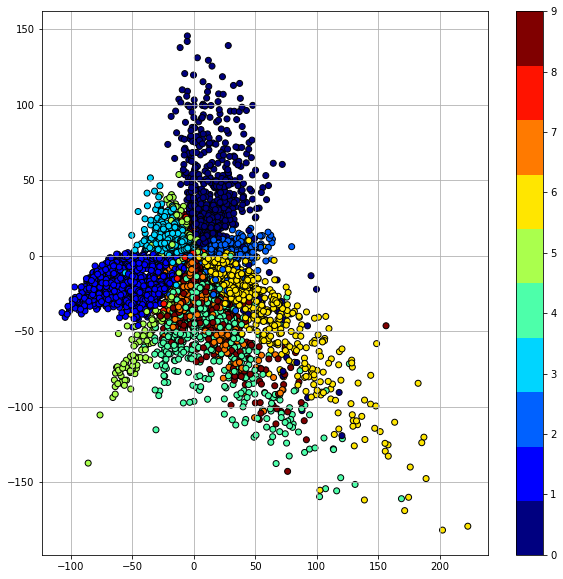

In [14]:
with torch.no_grad():
    model = trainer.model
    model.eval()
    z=[];label=[]
    for x,y in trainer.val_loader:

        z_ = model.encoder(x.to(trainer.device))
        z += z_.cpu().tolist()
        label += y.cpu().tolist()
    z = np.asarray(z)
    label = np.asarray(label)

from autoencoder_starter import scatter_plot
scatter_plot(latent_representations=z,labels=label)

In [15]:
# Generate images from Sampling Bottleneck features
# So here we are generating new images by sampling bottleneck features, and use the decoder to generate images.
# The code below provides an example of how to generate images by sampling bottleneck features.
# The display_images_in_a_row takes the following arguments:
# images: (N,28,28): N images of 28*28 as a numpy array
# file_path: file path name for where to store the figure
# display: display the image or not

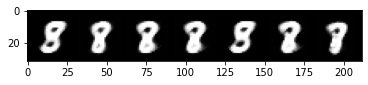

In [16]:
with torch.no_grad():
    samples = torch.randn(7, 2).to(trainer.device)
    samples = trainer.model.decoder(samples).cpu()

images = samples

from autoencoder_starter import display_images_in_a_row
display_images_in_a_row(images)

In [17]:
# Reconstructing Images
# We can first retrieve the validation set and then pick 64 images
# (the first 64 images, though you can do it randomly).
# We use the autoencoder to reconstruct the images and visualize them below.

In [18]:
# Origional First 64 Images

Original images


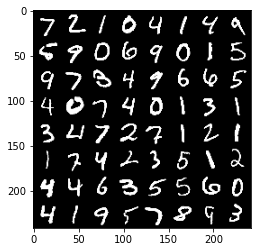

In [19]:
images = trainer.get_val_set() # get the entire validation set
total_number = 64
images = images[:total_number]

from autoencoder_starter import display_images_in_a_row
print("Original images")
display_images_in_a_row(images.cpu())

In [20]:
# Reconstruction images for first 64 images

Reconstructed images


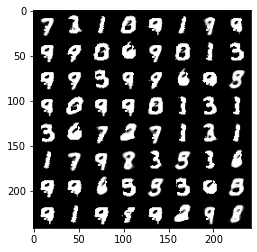

In [21]:
with torch.no_grad():
    images = images.to(trainer.device)
    reconstructed = trainer.model(images).cpu()
print("Reconstructed images")
display_images_in_a_row(reconstructed)

In [ ]:
# Interpolation of Bottleneck features 
# Below code is for Interpolation of Bottlenect features of encoder
# and then decoding to generate the images at each interval.
# all the interpolation interval's are printed according to below equation:
# More precisely, if we denote two images as x1 and x2, 
# the linear interpolationb x(t) in raw pixel space would be
# x(t) = t * x1 + (1 - t) * x2

torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([11, 28, 28])
Original images


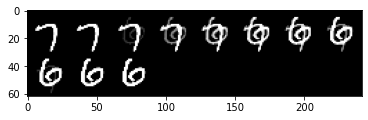

In [22]:
images = trainer.get_val_set() # get the entire validation set
i1 = images[11] #6
i2 = images[26] #7

print(i1.shape)
print(i2.shape)
output = []

t = 0
for i in range(11):
    v = t * i1 + (1-t) * i2
    t += 0.1
    output.append(v)

batch_output = torch.cat(output)    
print(batch_output.shape)

from autoencoder_starter import display_images_in_a_row
print("Original images")
display_images_in_a_row(batch_output.cpu())

In [23]:
# 10 Dimentional Bottleneck feature Autoencoder

In [24]:
class Autoencoder(nn.Module):

    def __init__(self,dim_latent_representation=10):

        super(Autoencoder,self).__init__()

        class Encoder(nn.Module):
            def __init__(self, output_size=10):
                super(Encoder, self).__init__()
                # needs your implementation
                self.encoder = nn.Sequential(
                    nn.Linear(28*28,1024),
                    nn.ReLU(),
                    nn.Linear(1024,10)
                )
                pass

            def forward(self, x):
                # needs your implementation
                x = torch.reshape(x, (x.size(0),28*28))
                x = self.encoder(x)
                return x
                pass

        class Decoder(nn.Module):
            def __init__(self, input_size=2):
                super(Decoder, self).__init__()
                # needs your implementation
                self.decoder = nn.Sequential(
                    nn.Linear(10,1024),
                    nn.ReLU(),
                    nn.Linear(1024,28*28),
                    nn.Sigmoid(),
                )
                pass

            def forward(self, z):
                # needs your implementation
                z = self.decoder(z)
                z = torch.reshape(z, (z.size(0),1,28,28))
                return z
                pass

        self.encoder = Encoder(output_size=dim_latent_representation)
        self.decoder = Decoder(input_size=dim_latent_representation)

    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [25]:
# Training 10 D bootleneck feature Model 

In [26]:
from autoencoder_starter import Autoencoder_Trainer

LEARNING_RATE = 1e-3
EPOCH_NUMBER= 25 # the number of epochs and learning rate can be tuned.

autoencoder = Autoencoder(dim_latent_representation=2)
trainer = Autoencoder_Trainer(autoencoder_model=autoencoder,learning_rate=LEARNING_RATE,path_prefix=path_prefix)

try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

100%|██████████| 1875/1875 [00:21<00:00, 86.65it/s] 

====> Epoch: 1 Average loss: 0.5780



100%|██████████| 313/313 [00:02<00:00, 140.20it/s]

====> Val set loss (reconstruction error) : 0.5627



100%|██████████| 1875/1875 [00:22<00:00, 83.03it/s]

====> Epoch: 2 Average loss: 0.5444



100%|██████████| 313/313 [00:02<00:00, 125.70it/s]

====> Val set loss (reconstruction error) : 0.5534



100%|██████████| 1875/1875 [00:21<00:00, 86.14it/s]

====> Epoch: 3 Average loss: 0.5373



100%|██████████| 313/313 [00:02<00:00, 153.03it/s]

====> Val set loss (reconstruction error) : 0.5491



100%|██████████| 1875/1875 [00:21<00:00, 86.17it/s]

====> Epoch: 4 Average loss: 0.5332



100%|██████████| 313/313 [00:02<00:00, 140.01it/s]

====> Val set loss (reconstruction error) : 0.5428



100%|██████████| 1875/1875 [00:20<00:00, 92.35it/s] 

====> Epoch: 5 Average loss: 0.5304



100%|██████████| 313/313 [00:01<00:00, 175.31it/s]

====> Val set loss (reconstruction error) : 0.5416



100%|██████████| 1875/1875 [00:21<00:00, 87.16it/s]

====> Epoch: 6 Average loss: 0.5283



100%|██████████| 313/313 [00:01<00:00, 165.85it/s]

====> Val set loss (reconstruction error) : 0.5389



100%|██████████| 1875/1875 [00:21<00:00, 86.78it/s]

====> Epoch: 7 Average loss: 0.5269



100%|██████████| 313/313 [00:01<00:00, 185.87it/s]

====> Val set loss (reconstruction error) : 0.5387



100%|██████████| 1875/1875 [00:20<00:00, 90.69it/s]

====> Epoch: 8 Average loss: 0.5257



100%|██████████| 313/313 [00:01<00:00, 185.12it/s]

====> Val set loss (reconstruction error) : 0.5383



100%|██████████| 1875/1875 [00:20<00:00, 89.89it/s]

====> Epoch: 9 Average loss: 0.5248



100%|██████████| 313/313 [00:02<00:00, 139.12it/s]

====> Val set loss (reconstruction error) : 0.5359



100%|██████████| 1875/1875 [00:21<00:00, 87.88it/s]

====> Epoch: 10 Average loss: 0.5240



100%|██████████| 313/313 [00:01<00:00, 161.28it/s]

====> Val set loss (reconstruction error) : 0.5368



100%|██████████| 1875/1875 [00:22<00:00, 83.04it/s]

====> Epoch: 11 Average loss: 0.5233



100%|██████████| 313/313 [00:01<00:00, 161.99it/s]

====> Val set loss (reconstruction error) : 0.5351



100%|██████████| 1875/1875 [00:25<00:00, 72.57it/s]

====> Epoch: 12 Average loss: 0.5228



100%|██████████| 313/313 [00:01<00:00, 174.02it/s]

====> Val set loss (reconstruction error) : 0.5350



100%|██████████| 1875/1875 [00:29<00:00, 63.79it/s]

====> Epoch: 13 Average loss: 0.5224



100%|██████████| 313/313 [00:01<00:00, 175.22it/s]

====> Val set loss (reconstruction error) : 0.5345



100%|██████████| 1875/1875 [00:30<00:00, 61.69it/s]


====> Epoch: 14 Average loss: 0.5219


100%|██████████| 313/313 [00:01<00:00, 174.04it/s]

====> Val set loss (reconstruction error) : 0.5340



100%|██████████| 1875/1875 [00:36<00:00, 51.01it/s]

====> Epoch: 15 Average loss: 0.5217



100%|██████████| 313/313 [00:01<00:00, 176.81it/s]

====> Val set loss (reconstruction error) : 0.5333



100%|██████████| 1875/1875 [00:36<00:00, 51.57it/s]

====> Epoch: 16 Average loss: 0.5214



100%|██████████| 313/313 [00:01<00:00, 185.86it/s]

====> Val set loss (reconstruction error) : 0.5329



100%|██████████| 1875/1875 [00:45<00:00, 41.04it/s]

====> Epoch: 17 Average loss: 0.5211



100%|██████████| 313/313 [00:01<00:00, 176.49it/s]

====> Val set loss (reconstruction error) : 0.5334



100%|██████████| 1875/1875 [00:50<00:00, 37.10it/s]

====> Epoch: 18 Average loss: 0.5209



100%|██████████| 313/313 [00:01<00:00, 163.39it/s]

====> Val set loss (reconstruction error) : 0.5324



100%|██████████| 1875/1875 [00:49<00:00, 37.63it/s]

====> Epoch: 19 Average loss: 0.5207



100%|██████████| 313/313 [00:01<00:00, 180.28it/s]

====> Val set loss (reconstruction error) : 0.5329



100%|██████████| 1875/1875 [00:53<00:00, 35.28it/s]

====> Epoch: 20 Average loss: 0.5205



100%|██████████| 313/313 [00:01<00:00, 175.86it/s]

====> Val set loss (reconstruction error) : 0.5322



100%|██████████| 1875/1875 [00:57<00:00, 32.66it/s]

====> Epoch: 21 Average loss: 0.5203



100%|██████████| 313/313 [00:01<00:00, 191.97it/s]

====> Val set loss (reconstruction error) : 0.5317



100%|██████████| 1875/1875 [01:08<00:00, 27.27it/s]

====> Epoch: 22 Average loss: 0.5202



100%|██████████| 313/313 [00:02<00:00, 117.74it/s]

====> Val set loss (reconstruction error) : 0.5314



100%|██████████| 1875/1875 [01:06<00:00, 28.10it/s]

====> Epoch: 23 Average loss: 0.5200



100%|██████████| 313/313 [00:02<00:00, 112.63it/s]

====> Val set loss (reconstruction error) : 0.5317



100%|██████████| 1875/1875 [01:13<00:00, 25.63it/s]

====> Epoch: 24 Average loss: 0.5199



100%|██████████| 313/313 [00:01<00:00, 161.23it/s]

====> Val set loss (reconstruction error) : 0.5315



100%|██████████| 1875/1875 [01:11<00:00, 26.27it/s]

====> Epoch: 25 Average loss: 0.5198



100%|██████████| 313/313 [00:02<00:00, 149.65it/s]

====> Val set loss (reconstruction error) : 0.5314


In [ ]:
# Interpolating 10D bottle neck Model to 
# find the difference between the 2D and 10D bottleneck 
# Features

torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 10])
torch.Size([1, 28, 28])
torch.Size([1, 10])
torch.Size([11, 10])
torch.Size([11, 1, 28, 28])
Original images


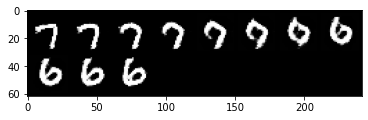

In [27]:
images = trainer.get_val_set() # get the entire validation set
i1 = images[11] #6
i2 = images[26] #7

print(i1.shape)
print(i2.shape)

with torch.no_grad():
    img1 = i1.to(trainer.device)
    print(img1.shape)
    eimg1 = trainer.model.encoder(img1)
    print(eimg1.shape)
    img2 = i2.to(trainer.device)
    print(img2.shape)
    eimg2 = trainer.model.encoder(img2)
    print(eimg2.shape)


output = []
t = 0
for i in range(11):
    v = t * eimg1 + (1-t) * eimg2
    t += 0.1
    output.append(v)

batch_output = torch.cat(output)    
print(batch_output.shape)

final_img = trainer.model.decoder(batch_output)
print(final_img.shape)

from autoencoder_starter import display_images_in_a_row
print("Original images")
display_images_in_a_row(final_img.cpu())

In [28]:
# Reconstructing 64 Images from 10 D model
# and Displayed below, the Training set is same as
# shown above

Original images


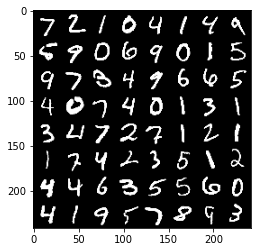

In [29]:
images = trainer.get_val_set() # get the entire validation set
total_number = 64
images = images[:total_number]

from autoencoder_starter import display_images_in_a_row
print("Original images")
display_images_in_a_row(images.cpu())